#  Emotion Recognition Model for TFD Dataset
 &#128522;&#9996;

We will start by loading the packages:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline

Then, we load the dataset:

In [ ]:
def load_data(file_name):
    npzfile = np.load(file_name)

    X_train = npzfile["inputs_train"].T / 255.0
    X_valid = npzfile["inputs_valid"].T / 255.0
    X_test = npzfile["inputs_test"].T / 255.0
    Y_train = npzfile["target_train"].tolist()
    Y_valid = npzfile["target_valid"].tolist()
    Y_test = npzfile["target_test"].tolist()

    num_class = max(Y_train + Y_valid + Y_test) + 1
    Y_train_1hot = np.zeros([num_class, len(Y_train)])
    Y_valid_1hot = np.zeros([num_class, len(Y_valid)])
    Y_test_1hot = np.zeros([num_class, len(Y_test)])

    for ii, xx in enumerate(Y_train):
        Y_train_1hot[xx, ii] = 1.0

    for ii, xx in enumerate(Y_valid):
        Y_valid_1hot[xx, ii] = 1.0

    for ii, xx in enumerate(Y_test):
        Y_test_1hot[xx, ii] = 1.0


    return X_train.T, X_valid.T, X_test.T, Y_train_1hot.T, Y_valid_1hot.T, Y_test_1hot.T


Run the next cell to load the dataset you are going to use.

In [ ]:
X_train, X_valid, X_test, Y_train, Y_valid, Y_test = load_data("toronto_face.npz")

In [ ]:
np.shape(X_train)

(3374, 2304)

Now, take a look at an example of a labelled image in the dataset
Feel free to change the value of index below and re-run to see different examples.

In [ ]:
ix = 45;

plt.figure(ix)
plt.imshow(X_train[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [ ]:
import tensorflow as tf
import keras
from keras.regularizers import l1


a) The following model has been created arbitrarily, and the goal is to examine its performance on the test set after training this model.
The following network consists of three layers: the first layer includes 100 neurons, the second layer includes 70 neurons, and the last layer (output layer) consists of three neurons.
The activation functions for the middle layers are considered to be relu, and softmax is used for the last layer.


In [ ]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(2304,)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(70, activation=tf.nn.relu),
    keras.layers.Dense(7, activation=tf.nn.softmax)
])

Gradient descent is used as the optimizer function, and its learning rate changes using the learning rate decay method.


In [ ]:
from keras.optimizers import SGD
opt=SGD(lr=0.01,decay=0.0001)

Categorical crossentropy is used as the loss function, the number of epochs is set to 200, and the batch size is set to 1.

In [ ]:
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
history=model.fit(X_train,Y_train,epochs=200,batch_size=1,verbose=2,
                  validation_data=(X_valid, Y_valid))

Epoch 1/200
3374/3374 - 6s - loss: 1.8452 - accuracy: 0.2795 - precision_7: 0.4118 - recall_7: 0.0083 - val_loss: 1.6825 - val_accuracy: 0.3079 - val_precision_7: 0.3750 - val_recall_7: 0.0072
Epoch 2/200
3374/3374 - 5s - loss: 1.6229 - accuracy: 0.4016 - precision_7: 0.5929 - recall_7: 0.1239 - val_loss: 1.4397 - val_accuracy: 0.5084 - val_precision_7: 0.8889 - val_recall_7: 0.1527
Epoch 3/200
3374/3374 - 5s - loss: 1.4830 - accuracy: 0.4683 - precision_7: 0.6449 - recall_7: 0.2255 - val_loss: 1.3502 - val_accuracy: 0.5632 - val_precision_7: 0.8058 - val_recall_7: 0.1981
Epoch 4/200
3374/3374 - 5s - loss: 1.3983 - accuracy: 0.5024 - precision_7: 0.6814 - recall_7: 0.2833 - val_loss: 1.2532 - val_accuracy: 0.5800 - val_precision_7: 0.8013 - val_recall_7: 0.2888
Epoch 5/200
3374/3374 - 5s - loss: 1.3018 - accuracy: 0.5445 - precision_7: 0.7027 - recall_7: 0.3391 - val_loss: 1.2273 - val_accuracy: 0.5632 - val_precision_7: 0.7236 - val_recall_7: 0.3437
Epoch 6/200
3374/3374 - 5s - loss: 

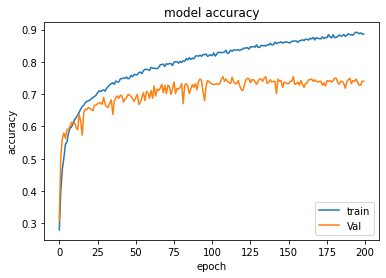

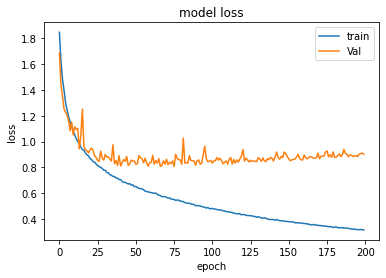

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper right')
plt.show()

As can be seen, this network does not have an underfitting problem because the model's error on the training data decreases and its accuracy increases over the epochs. However, the model's performance on the training and evaluation data is not similar, so we can conclude that the model has overfitted. One of the methods to prevent overfitting is the dropout method, which is used next, and the model's performance is examined.


In [ ]:
model.evaluate(X_test,Y_test,batch_size=1)

385/385 [==============================] - 0s 1ms/step - loss: 0.8563 - accuracy: 0.7143 - precision_7: 0.7657 - recall_7: 0.6961


[0.8562824726104736,
 0.7142857313156128,
 0.7657142877578735,
 0.6961038708686829]

In this section, the accuracy, recall, precision, and F1_score of the model on the test data are shown. The model's accuracy on the training data reached 88%, while on the test data, the accuracy is 75%, indicating that the model's generalization capability is low.


In [ ]:
y_pred = model.predict(X_test, batch_size=1, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
real=np.argmax(Y_test,axis=1)
print(classification_report(real, y_pred_bool))

385/385 [==============================] - 0s 831us/step
              precision    recall  f1-score   support

           0       0.65      0.58      0.61        38
           1       0.66      0.57      0.61        40
           2       0.58      0.46      0.51        41
           3       0.88      0.88      0.88        64
           4       0.54      0.61      0.57        41
           5       0.61      0.87      0.72        39
           6       0.82      0.79      0.80       122

    accuracy                           0.71       385
   macro avg       0.68      0.68      0.67       385
weighted avg       0.72      0.71      0.71       385



Dropout layers have been added to the previous model. Next, we will train the model.

In [ ]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(2304,)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(70, activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(7, activation=tf.nn.softmax)
])

In [ ]:
from keras.optimizers import SGD
opt=SGD(lr=0.01,decay=0.0001)

In [ ]:
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
history=model.fit(X_train,Y_train,epochs=200,batch_size=1,verbose=2,
                  validation_data=(X_valid, Y_valid))

Epoch 1/200
3374/3374 - 6s - loss: 1.8660 - accuracy: 0.2807 - precision_10: 0.2807 - recall_10: 0.0047 - val_loss: 1.7805 - val_accuracy: 0.2792 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 2/200
3374/3374 - 5s - loss: 1.8022 - accuracy: 0.2996 - precision_10: 0.5824 - recall_10: 0.0157 - val_loss: 1.7004 - val_accuracy: 0.3914 - val_precision_10: 1.0000 - val_recall_10: 0.0143
Epoch 3/200
3374/3374 - 5s - loss: 1.6801 - accuracy: 0.3731 - precision_10: 0.6923 - recall_10: 0.0800 - val_loss: 1.5182 - val_accuracy: 0.4654 - val_precision_10: 0.8684 - val_recall_10: 0.0788
Epoch 4/200
3374/3374 - 5s - loss: 1.6091 - accuracy: 0.3986 - precision_10: 0.7518 - recall_10: 0.1221 - val_loss: 1.5308 - val_accuracy: 0.4368 - val_precision_10: 1.0000 - val_recall_10: 0.0716
Epoch 5/200
3374/3374 - 5s - loss: 1.5799 - accuracy: 0.4173 - precision_10: 0.7597 - recall_10: 0.1331 - val_loss: 1.4532 - val_accuracy: 0.4797 - val_precision_10: 1.0000 - val_recall_10: 0.1050
Epoch 6

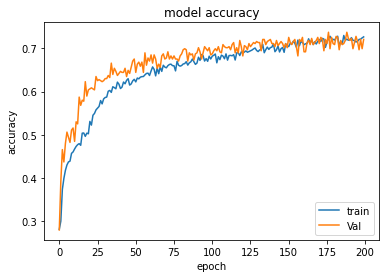

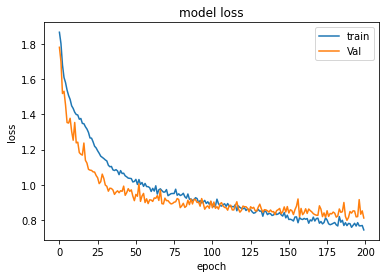

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper right')
plt.show()

As you can see, after using the dropout technique, the performance of the model on the training and test data has become similar, and overfitting has been addressed.

In [ ]:
model.evaluate(X_test,Y_test,batch_size=1)
y_pred = model.predict(X_test, batch_size=1, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
real=np.argmax(Y_test,axis=1)
print(classification_report(real, y_pred_bool))

385/385 [==============================] - 0s 834us/step
              precision    recall  f1-score   support

           0       0.75      0.47      0.58        38
           1       0.60      0.70      0.64        40
           2       0.45      0.34      0.39        41
           3       0.93      0.84      0.89        64
           4       0.60      0.61      0.60        41
           5       0.73      0.82      0.77        39
           6       0.75      0.85      0.80       122

    accuracy                           0.71       385
   macro avg       0.69      0.66      0.67       385
weighted avg       0.71      0.71      0.71       385



In this section, a function is written to determine the appropriate learning rate for the network. A batch size of 32 is considered. The SGD optimizer function is used. For each of these learning rates, the loss graph over 200 epochs is plotted.

In [ ]:

def Learning_rate(m):
  model.compile(optimizer=m,
              loss='categorical_crossentropy')

  history=model.fit(X_train,Y_train,epochs=100,batch_size=32,verbose=0,
                  validation_data=(X_valid, Y_valid))

  return history.history['loss']


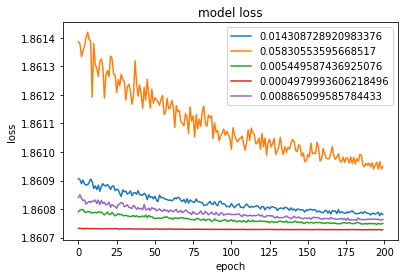

In [ ]:
for i in range(5):
  r=-4*np.random.rand()
  alpha=10**r
  plt.plot(Learning_rate(alpha),label =alpha)
  plt.title('model loss for SGD')
  plt.ylabel('loss')
  plt.xlabel('epoch')

plt.legend()
plt.show()


Based on the results, high values of learning rate (orange-colored graph) cause significant fluctuations in the loss function after each update, which can be the reason for the high noise in this graph. Due to inappropriate step size, the orange graph fails to reduce its error to the extent of the other graphs, thereby slowing down convergence and possibly leading to divergence. Therefore, it is not a good choice for this network.

The blue, purple, and green graphs represent more suitable choices for the learning rate. The red-colored graph, due to its very small learning rate, fails to show significant changes in error over 200 epochs, indicating very slow convergence. Hence, this value is also not a suitable choice for the network.

Based on the obtained graphs, starting with a learning rate of 0.01 seems appropriate because it significantly reduces the error and gradually (for example, after 100 epochs) reduces the learning rate to prevent divergence.


In [ ]:
from keras.optimizers import SGD
opt=SGD(lr=0.01,decay=0.0001)

In [ ]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(2304,)),
    keras.layers.Dense(100, activation=tf.nn.relu),

    keras.layers.Dense(70, activation=tf.nn.relu),

    keras.layers.Dense(7, activation=tf.nn.softmax)
])


In this section, a function is defined to determine the appropriate batch size for the model. In this experiment, five different batch sizes ranging from 10 to 1000 are given to the model, and the loss graph is plotted for each case over 100 epochs using the SGD optimizer function with a learning rate of 0.01, as shown below.


In [ ]:
def batch_size(m):
  model.compile(optimizer=opt,
              loss='categorical_crossentropy')

  history=model.fit(X_train,Y_train,epochs=100,batch_size=m,verbose=0,
                  validation_data=(X_valid, Y_valid))

  return history.history['loss']


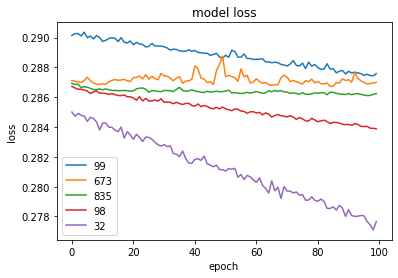

In [ ]:

P=np.random.randint(10,1000,5)
for i in range(5):
  m=P[i]
  plt.plot(batch_size(m),label =m)
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')

plt.legend()
plt.show()

The obtained loss graphs for different batch sizes all exhibit noise. The reason for this is that in mini-batch methods, we approximate the cost function, so sometimes this approximation may not be accurate.

Based on the obtained graphs, as the batch size decreases, the error decreases at a faster rate. This can be due to high correlations between the dataset's data (such as facial images being very similar). With higher correlations, smaller batch sizes can achieve results more quickly.

To select the best value for this parameter, testing values around 32 could be effective, and choosing the best among them would be advisable.

c) In this experiment, three different values for the number of neurons in each layer are considered. Below, the error graphs for training and evaluation data are plotted for each of these three cases.

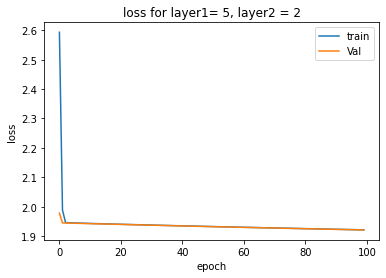

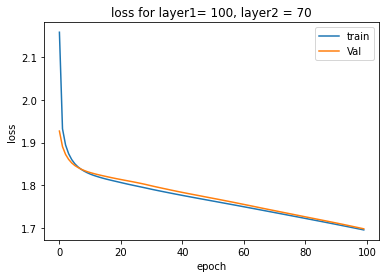

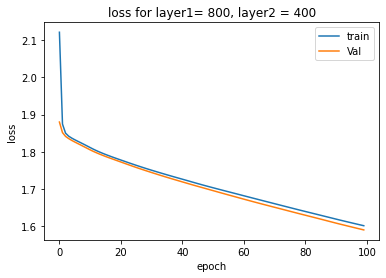

In [ ]:
for i in range(3):

  P=[5,100,800]
  H=[2,70,400]
  layer1=P[i]
  layer2=H[i]
  model= keras.Sequential([
      keras.layers.Flatten(input_shape=(2304,)),
      keras.layers.Dense(layer1, activation=tf.nn.relu),
      keras.layers.Dense(layer2, activation=tf.nn.relu),
      keras.layers.Dense(7, activation=tf.nn.softmax)
  ])
  from keras.optimizers import SGD
  opt=SGD(lr=0.01,decay=0.0001)
  model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history=model.fit(X_train,Y_train,epochs=100,batch_size=3374,verbose=0,
                    validation_data=(X_valid, Y_valid))

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('loss for layer1= '+str(layer1)+', layer2 = '+str(layer2))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'Val'], loc='upper right')
  plt.show()


Experiment 1: The first layer has 5 neurons and the second layer has 2 neurons. After 100 epochs, the error on both training and evaluation data is higher compared to the other two cases. Continuing the training process will not reduce the error and converge to the minimum point, indicating underfitting. The error on both training and evaluation data is high, suggesting that the model lacks the ability to generalize to test data.

Experiment 2: The first layer has 100 neurons and the second layer has 70 neurons. The error on both training and evaluation data is lower compared to the first case. Since overfitting has not occurred, this network may provide good predictions for test data.

Experiment 3: The first layer has 800 neurons and the second layer has 400 neurons. The error of this model on both training and evaluation data is lower than the previous two cases. If this model does not overfit in further training, it is likely to have good predictive ability on test data.


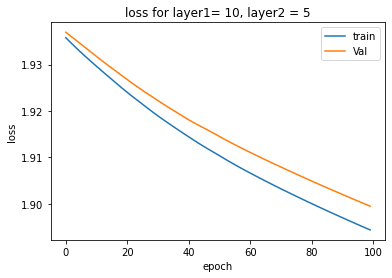

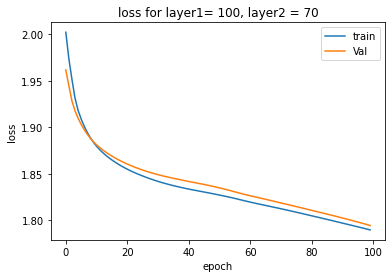

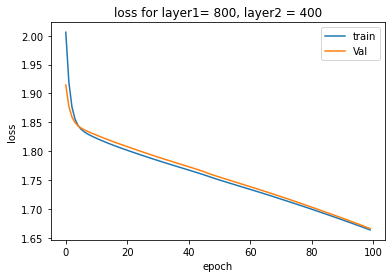

In [ ]:
for i in range(3):

  P=[10,100,800]
  H=[5,70,400]
  layer1=P[i]
  layer2=H[i]
  model= keras.Sequential([
      keras.layers.Flatten(input_shape=(2304,)),
      keras.layers.Dense(layer1, activation=tf.nn.relu),
      keras.layers.Dense(layer1, activation=tf.nn.relu),
      keras.layers.Dense(layer1, activation=tf.nn.relu),
      keras.layers.Dense(layer2, activation=tf.nn.relu),
      keras.layers.Dense(7, activation=tf.nn.softmax)
  ])
  from keras.optimizers import SGD
  opt=SGD(lr=0.01,decay=0.0001)
  model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history=model.fit(X_train,Y_train,epochs=100,batch_size=3374,verbose=0,
                    validation_data=(X_valid, Y_valid))

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('loss for layer1= '+str(layer1)+', layer2 = '+str(layer2))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'Val'], loc='upper right')
  plt.show()


In this stage, a function is presented to compare the performance of different optimization algorithms. A three-layer network is used with 100 neurons in the first layer, 70 neurons in the second layer, and 7 neurons in the last layer. The learning rate is set to 0.01, and momentum is set to 0.9 for the GD with momentum algorithm. The data is fed to the network as full batch.

The optimization algorithms Gradient Descent (GD), Adam, Rmsprop, and GD with momentum are used as optimizer functions for this network. The error graph during training epochs is plotted below to compare their performance.


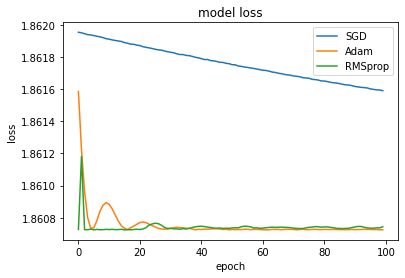

In [ ]:
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.optimizers import SGD
alpha=0.01
opt=SGD(lr=alpha)
plt.plot(Learning_rate(opt),label ='SGD')
opt=Adam(alpha)
plt.plot(Learning_rate(opt),label ='Adam')
opt=RMSprop(alpha)
plt.plot(Learning_rate(opt),label ='RMSprop')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

As you can see, the training error for the GD method is higher compared to Adam and RMSprop. In Adam and RMSprop methods, the error decreases more rapidly, which accelerates learning. Regarding the oscillations in these two methods during initial epochs, perhaps by tuning the hyperparameters more precisely, such oscillations can be mitigated, leading to better results.


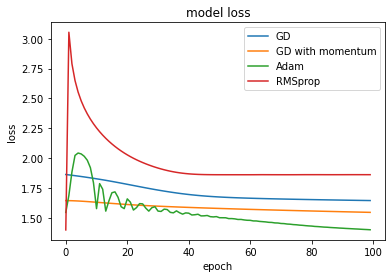

In [ ]:
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import RMSprop
alpha=0.01
opt=SGD(lr=alpha)
plt.plot(Learning_rate(opt),label ='GD')
opt=SGD(lr=alpha,momentum=0.9)
plt.plot(Learning_rate(opt),label ='GD with momentum')
opt=Adam(alpha)
plt.plot(Learning_rate(opt),label ='Adam')
opt=RMSprop(alpha)
plt.plot(Learning_rate(opt),label ='RMSprop')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

This graph demonstrates that the Adam algorithm performs better. The poor performance of the RMSprop algorithm compared to GD may be mitigated by better hyperparameter tuning.


The final model, designed based on the results of previous stages, will be trained further.

In [ ]:
model1= keras.Sequential([
    keras.layers.Flatten(input_shape=(2304,)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(70, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(7, activation=tf.nn.softmax)
])
from keras.optimizers import SGD
opt=SGD(lr=0.01,decay=0.0001)
model1.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
history1=model1.fit(X_train,Y_train,epochs=500,batch_size=32,verbose=2,
                  validation_data=(X_valid, Y_valid))

Epoch 1/500
106/106 - 2s - loss: 1.8561 - accuracy: 0.2836 - precision: 0.3276 - recall: 0.0056 - val_loss: 1.7770 - val_accuracy: 0.3699 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/500
106/106 - 0s - loss: 1.7733 - accuracy: 0.3355 - precision: 0.4717 - recall: 0.0148 - val_loss: 1.7025 - val_accuracy: 0.3795 - val_precision: 0.6000 - val_recall: 0.0072
Epoch 3/500
106/106 - 0s - loss: 1.7019 - accuracy: 0.3705 - precision: 0.5240 - recall: 0.0323 - val_loss: 1.6213 - val_accuracy: 0.4702 - val_precision: 0.8000 - val_recall: 0.0095
Epoch 4/500
106/106 - 0s - loss: 1.6211 - accuracy: 0.4209 - precision: 0.6538 - recall: 0.0705 - val_loss: 1.5365 - val_accuracy: 0.4869 - val_precision: 0.7692 - val_recall: 0.0477
Epoch 5/500
106/106 - 0s - loss: 1.5495 - accuracy: 0.4487 - precision: 0.6479 - recall: 0.1162 - val_loss: 1.4565 - val_accuracy: 0.4797 - val_precision: 0.6429 - val_recall: 0.2792
Epoch 6/500
106/106 - 0s - loss: 1.5007 - accuracy: 0.4727 - precision: 0.659

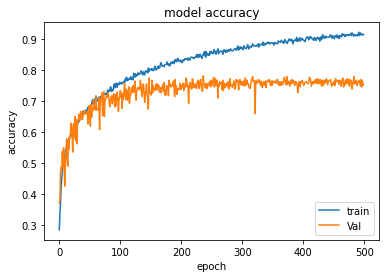

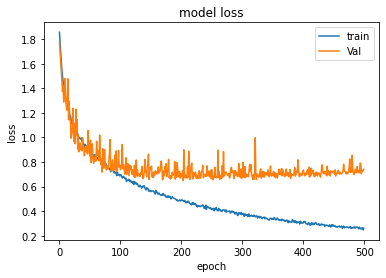

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='lower right')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper right')
plt.show()

The final accuracy of the trained model on the test data reached 78%.

In [ ]:
model1.evaluate(X_test,Y_test,batch_size=32)
y_pred = model1.predict(X_test, batch_size=32, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
real=np.argmax(Y_test,axis=1)
print(classification_report(real, y_pred_bool))

13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.58      0.74      0.65        38
           1       0.68      0.80      0.74        40
           2       0.89      0.41      0.57        41
           3       0.91      0.92      0.91        64
           4       0.83      0.59      0.69        41
           5       0.64      0.97      0.78        39
           6       0.87      0.84      0.86       122

    accuracy                           0.78       385
   macro avg       0.77      0.75      0.74       385
weighted avg       0.80      0.78      0.78       385



In this section, you will see the numbers of data points that the network did not classify correctly.

In [ ]:
np.where(real!=y_pred_bool)

(array([  5,  11,  19,  24,  29,  30,  33,  35,  39,  46,  49,  53,  57,
         66,  71,  90,  91,  92,  93,  94,  95, 100, 105, 110, 114, 116,
        120, 121, 136, 142, 144, 152, 153, 155, 160, 163, 167, 168, 174,
        184, 185, 186, 187, 189, 191, 197, 200, 201, 204, 206, 210, 214,
        225, 226, 230, 231, 244, 246, 253, 261, 267, 271, 272, 275, 279,
        301, 302, 303, 309, 310, 314, 315, 320, 334, 339, 357, 360, 363,
        364, 366, 367, 368, 371, 380]),)

6
4
[6.1847237e-03 9.6512304e-05 4.5561846e-04 8.3994955e-06 1.3825758e-01
 7.6737531e-05 8.5492039e-01]


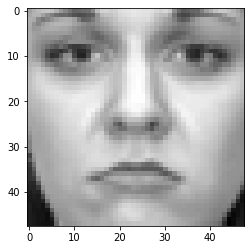

In [ ]:
a=5
print(y_pred_bool[a])
print(real[a])
print(y_pred[a])
ix = a;

plt.figure(ix)
plt.imshow(X_test[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

This image has been classified as neutral whereas it expresses sadness.

6
3
[1.13247270e-02 2.01513385e-03 1.16229145e-04 5.77719742e-03
 1.10787861e-02 1.48099347e-03 9.68206942e-01]


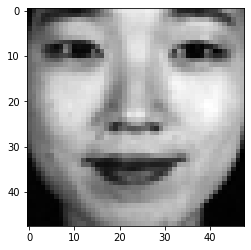

In [ ]:
a=187
print(y_pred_bool[a])
print(real[a])
print(y_pred[a])
ix = a;
plt.figure(ix)
plt.imshow(X_test[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

This image has been classified as neutral whereas it shows happiness.

84 data points have been misclassified out of the test data.

In [ ]:
H=np.where(real!=y_pred_bool)
G=y_pred_bool[H]
np.shape(G)

(84,)

Out of the 84 misclassified data points, 21 have been incorrectly classified as neutral, which is a significant number.

In [ ]:
for i in range(6):
  L=np.where(G==i)
  print(np.shape(L))

(1, 20)
(1, 15)
(1, 2)
(1, 6)
(1, 5)
(1, 21)


It's possible that the large number of samples belonging to the neutral class in the training dataset is the reason for this issue. There are approximately 963 samples labeled as neutral in the training dataset, whereas the other classes have around 300 samples each. This imbalance can lead to a phenomenon called an imbalanced dataset. In such cases, the network weights are often biased towards the neutral class (due to its higher number of samples), causing higher errors on samples from other classes.

One way to overcome this problem is to reduce the number of samples related to the neutral class in the training dataset.

As a solution, 650 samples belonging to the neutral class have been randomly selected and removed from the training dataset to balance the number of samples across all classes to around 300 samples each."

In [ ]:
np.shape(Y_train)
newY_train=np.argmax(Y_train,axis=1)
L=[]


In [ ]:
np.shape(newY_train)
F=[]

In [ ]:
for i in range(3374):
  if newY_train[i]==6:
    F.append(i)


In [ ]:
print(np.shape(F))

(963,)


In [ ]:
P=np.random.choice(F,650)

In [ ]:
np.shape(P)

(650,)

This is the new dataset on which the network will be trained with the remaining samples.

In [ ]:
newXtrain=np.delete(X_train,P,axis=0)
newYtrain=np.delete(Y_train,P,axis=0)

In [ ]:
print(np.shape(newXtrain))
print(np.shape(newYtrain))

(2887, 2304)
(2887, 7)


In [ ]:
T=np.argmax(newYtrain,axis=1)

In [ ]:
np.shape(np.where(T==6))

(1, 476)

In [ ]:
model1= keras.Sequential([
    keras.layers.Flatten(input_shape=(2304,)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(70, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(7, activation=tf.nn.softmax)
])
from keras.optimizers import SGD
opt=SGD(lr=0.01,decay=0.0001)
model1.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
history1=model1.fit(newXtrain,newYtrain,epochs=500,batch_size=32,verbose=2,
                  validation_data=(X_valid, Y_valid))

Epoch 1/500
91/91 - 1s - loss: 1.9062 - accuracy: 0.2355 - precision_1: 0.2500 - recall_1: 6.9276e-04 - val_loss: 1.8330 - val_accuracy: 0.2124 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/500
91/91 - 0s - loss: 1.8333 - accuracy: 0.2899 - precision_1: 0.6857 - recall_1: 0.0083 - val_loss: 1.7712 - val_accuracy: 0.3986 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/500
91/91 - 0s - loss: 1.7728 - accuracy: 0.3280 - precision_1: 0.7565 - recall_1: 0.0301 - val_loss: 1.8809 - val_accuracy: 0.1575 - val_precision_1: 0.8333 - val_recall_1: 0.0119
Epoch 4/500
91/91 - 0s - loss: 1.7286 - accuracy: 0.3391 - precision_1: 0.7721 - recall_1: 0.0575 - val_loss: 1.6041 - val_accuracy: 0.4535 - val_precision_1: 0.9500 - val_recall_1: 0.0453
Epoch 5/500
91/91 - 0s - loss: 1.6556 - accuracy: 0.3748 - precision_1: 0.8000 - recall_1: 0.0928 - val_loss: 1.7444 - val_accuracy: 0.3652 - val_precision_1: 0.5000 - val_recall_1: 0.0167
Epoch 6/500
91/91 - 0s - loss: 1.62

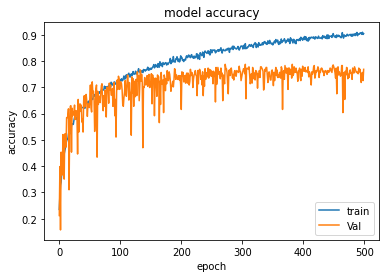

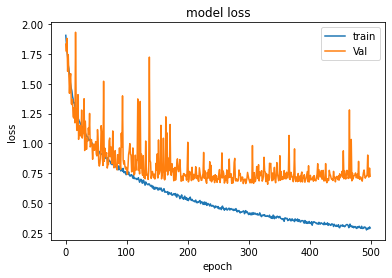

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='lower right')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper right')
plt.show()

In [ ]:
model1.evaluate(X_test,Y_test,batch_size=32)
y_pred = model1.predict(X_test, batch_size=32, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
real=np.argmax(Y_test,axis=1)
print(classification_report(real, y_pred_bool))

13/13 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.78      0.66      0.71        38
           1       0.66      0.68      0.67        40
           2       0.55      0.63      0.59        41
           3       0.91      0.95      0.93        64
           4       0.71      0.54      0.61        41
           5       0.61      0.97      0.75        39
           6       0.90      0.78      0.84       122

    accuracy                           0.76       385
   macro avg       0.73      0.74      0.73       385
weighted avg       0.78      0.76      0.76       385



The new network succeeded in correctly classifying the data points that were mentioned earlier. By reducing the number of samples related to the neutral class, the network was able to correctly classify the data points that were mistakenly categorized as neutral.

4
4
[3.5729085e-03 4.2715645e-04 5.3545451e-03 3.7974605e-05 8.5627633e-01
 8.4711303e-04 1.3348386e-01]


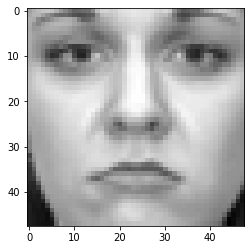

In [ ]:
a=5
print(y_pred_bool[a])
print(real[a])
print(y_pred[a])
ix = a;

plt.figure(ix)
plt.imshow(X_test[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

3
3
[0.02976303 0.00665978 0.00091601 0.77387697 0.16966107 0.00166885
 0.01745423]


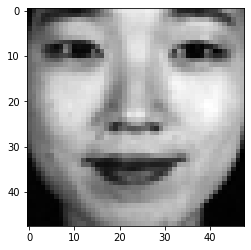

In [ ]:
a=187
print(y_pred_bool[a])
print(real[a])
print(y_pred[a])
ix = a;
plt.figure(ix)
plt.imshow(X_test[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()